In [14]:
import json
from PIL import Image
import os
import pickle
import torch
import torch.utils.data as data
from PIL import Image
import numpy as np
from torchvision import transforms
from matplotlib.pyplot import imshow

In [18]:
with open('paragraphs_v1.json', 'r') as f:
    data = json.load(f)
caption = dict()
for each in data:
    caption[str(each['image_id'])] = {
        'paragraph': each['paragraph'],
        'url': each['url'],
        'image_id': each['image_id']
    }
with open('../captions.json', 'w') as f:
    json.dump(caption, f)
print(type(caption))
print(caption['2408051'])

<class 'dict'>


KeyError: '2408051'

In [48]:
image_id = '2353061'
image = Image.open(os.path.join("data/images", "{}.jpg".format(image_id))).convert('RGB')

In [19]:
exists = os.path.isfile(os.path.join("data/images", "{}.jpg".format(image_id)))

In [20]:
exists

True

{'2398675': {'image_id': 2398675,
  'paragraph': 'Indoors there a bright lime green container that says Donation Station. it has a clear glass that can let people see inside. It also has a sticker with information on it, a phone number and website address. The Donation Station is located indoors and on the ceiling there are red lights. There is a plant to the right of it.',
  'url': 'https://cs.stanford.edu/people/rak248/VG_100K_2/2398675.jpg'},
 '2323545': {'image_id': 2323545,
  'paragraph': 'Two people are being shown continuing their days outside. A lady in a white tank top is in full jogging attire, running with her dog on a leash. A man with a navy hooded jacket is riding on a bike through an intersection. Some cars are parked off in the background. ',
  'url': 'https://cs.stanford.edu/people/rak248/VG_100K/2323545.jpg'},
 '2388045': {'image_id': 2388045,
  'paragraph': 'A baseball game is in progress. One player is sliding towards a base as a player from the opposite team is sta

In [47]:
missing = []

for key,data in caption.items():
    #print(data['image_id'])
    isExist = os.path.isfile(os.path.join("data/images", "{}.jpg".format(image_id)))
    if  isExist:
        print(data['image_id'])
        #missing.append(data['image_id'])
    

2398675
2323545
2388045
2415396
2370341
2410146
2316743
2382631
2353061
2364115
2324645
2322481
2380357
2410738
2344388
2396234
2390412
2345893
2358484
2317099
2317855
2354115
2362242
2400936
2356915
2321253
2348012
2377960
2364778
2383893
2409061
2345610
2349676
2320423
2394448
2348253
2372174
2319283
2376521
2351465
2386684
2348788
2360127
2362506
2417780
2319762
2322495
2338006
2390741
2364637
2368118
2413233
2382118
2353626
2319197
2384268
2385877
2375345
2413575
2338097
2322869
2342214
2408146
2351157
2317583
2365111
2380482
2344365
2368073
2368777
2393787
2335695
2333122
2369572
2326725
2353296
2343935
2370312
2387269
2409137
2320133
2340165
2411174
2365172
2373814
2372028
2381459
2351205
2417987
2403261
2319442
2372990
2402461
2353981
2413098
2390624
2379575
2401674
2365336
2401271
2328266
2409628
2354653
2346205
2319273
2367713
2415134
724
2413416
2317435
2355327
2392220
2370172
2404549
4622
2378805
2384699
2357480
2402124
2384329
2354410
2363823
2410683
2376941
2366112
2414111

2403714
2348436
2361412
2345826
2411710
2391850
2365954
2341246
2412691
2343346
2318955
2333656
2347187
2380871
2401632
2403729
2360362
2400832
2415125
2372883
2366511
2392630
2395468
2374090
2405289
2354621
2357484
2396290
2397095
2342001
2414464
2379634
2416824
2342415
2409277
2377315
2373286
2410533
2346552
2381902
2411037
2388879
2387842
2351067
2373213
2358392
2383443
2398486
2321883
2405377
2326179
2385491
2361213
2386728
2328917
2368774
2349488
2399926
2409421
2345317
2322201
2354588
2363529
2404962
2416633
2417779
2405706
2408289
2359183
2389620
2345026
2386847
2354326
2385403
2401592
2405756
2414151
2373473
2367002
2362207
2383110
2377815
2372201
685
2350946
2387720
2345335
2371017
2352476
2316752
2351811
2316617
2359657
2343259
2399275
2395062
2353966
2337871
2378849
2401712
2319907
2318083
2344677
2374234
2415308
2397629
2338163
2316931
2382309
2399158
2327572
2354288
2375164
2407523
2352642
2360724
2337144
2364149
2341989
2405642
2354294
2366495
2396179
2394210
2392547
2411

2349002
2320130
2365478
2333661
2406227
2330197
2352132
2343177
2367202
2411237
2401278
2411045
2397143
2387657
2389172
2363248
2318272
2363965
2401822
2395079
2366588
2414259
2369272
2388884
713210
2383374
2373075
2369165
2323401
2318221
2383668
2346501
2417495
2400439
2366615
2351878
2317870
2394206
2358539
2327503
2409161
2371950
2370109
2415978
2340875
2320000
2348176
2394396
2401145
2327483
2362156
2374860
2412495
2407403
2363900
2368401
2384313
2396165
2357038
2318552
2333007
2340435
2395261
2352077
2333293
2401026
2343378
2392331
2377415
2408949
2358395
2351013
2389597
2354740
2377108
2371037
2377783
2377254
2349108
2381777
2407499
2379265
2374760
2370526
2346190
2404616
2354833
2396438
2355202
2416140
2402864
2368147
2354792
2411783
1159963
2318042
2384842
2373464
2412907
2407556
2316389
2344597
2408091
2367447
2316316
2354340
232
2371250
2368310
2319531
2335532
2373200
2336367
2412107
2409729
2415186
2416075
2341140
2369312
2373532
2357089
2409807
2410863
2413014
2366600
23252

2335619
2396125
2348841
2324873
2346922
2410788
2410547
2343645
2377379
2411709
2417503
2417244
2413029
2364061
2344420
2398607
2319466
2359523
2401084
2333731
2394911
2389036
2323899
2367052
2387802
2385703
2359556
2371188
2316279
2372056
2417722
2334490
2362481
2411175
1159380
2352535
2350114
2403309
2373878
2363539
2383962
2360398
2322728
2344695
2399103
2357536
2347455
2330766
2374552
2369296
2344661
2393726
2409040
2343653
2360257
2406423
2348143
2362965
2377704
2359575
2383120
2386095
2357274
2327657
2398983
2416591
2366129
2393593
2366308
2375723
2350282
2409660
2406553
2331683
2324264
2390273
2375905
2377052
2392993
2361684
2384195
2416652
2400501
2357371
2357052
2411955
2374890
2350362
2344858
2373876
2354965
2317269
2359986
2357292
2356398
2377936
2396247
2316166
2402057
2340504
2327449
2374723
2385334
2360765
2395365
2387230
2374916
2363536
2374391
2382723
2363150
2365119
2413767
2362929
2353667
2356507
2353788
2335323
2388160
2354006
2410438
2352558
2341363
2400918
2408293


2394958
2397065
2339981
2336596
2410092
2390803
2360483
2414514
2389880
2347304
2394932
2377331
2400652
2414966
2330337
2379689
2410179
2352318
2319593
2417786
2361467
2363896
2383514
2371209
2417760
2404576
2365931
2354519
2334939
2345727
2375237
2371425
2348088
2362256
2391844
2351789
2385029
2413857
2414578
2377445
2342002
2388854
2346252
2317858
2395806
2389733
2373644
2365627
2347740
2410955
2341672
2404652
2349600
2366780
2325668
2411883
2388174
2397434
2368131
2361189
2368019
2351834
2318579
2360902
2391189
2332693
2370112
2394604
2340310
2374841
2395507
2352534
2408573
2402512
2413015
286039
2343214
2370909
2395884
2365287
2414540
2399821
2384065
2377950
2381108
2323040
2371260
2374892
2377796
2325876
2323588
2392476
2366580
2353150
2359302
2413536
2388716
2406056
2382747
2336170
2357444
2401262
2372765
137
2383825
2332695
2317169
2348208
2400258
2324451
2391202
1160018
2384267
2376454
2386140
2383878
2374295
2325817
2342222
2349442
2382016
2321636
2409300
2322153
2338088
23708

2404004
2354567
2324471
2409793
2369142
2347351
2331230
2365103
2387612
2401944
2359669
2348878
2348914
2392659
2380801
2350380
2358054
2409598
2368490
2412252
2332129
2373004
2350269
2321475
2335275
2377300
2397708
2336464
2330974
2354295
2357895
2385307
2402713
2413982
2362869
2369024
2343703
2337608
2395381
2372861
2382577
2346415
2364850
2382893
2362590
2378007
2347382
2411640
2375024
2373113
2326806
2328620
2318246
2413066
2415170
2346977
2368276
2319944
2331078
2400425
2416114
2356811
2347618
2410723
2394619
2360860
2372706
2359153
2323052
2417308
2338586
2327448
2371023
2346964
2372375
2368460
2387904
2316574
2414507
2363743
2384258
2331045
2395785
2408449
2357514
2354531
2388650
2345934
2333255
2404119
2323088
2352934
2371583
2353696
2401109
2408710
2359604
2377142
2342711
2368232
2364236
2409481
2333055
2336638
2339690
2367095
2350361
2350578
2382329
2348501
2394809
2410143
2401512
2382463
2388592
2353402
2337198
2317282
2366916
2349595
2416712
2403002
2373874
2354013
2364508


2408870
2365141
2359537
2402815
2321251
2334013
2384045
2391951
2409620
2390511
2399357
2316869
2388484
2403233
2401059
2343357
2389080
2368231
2352274
2388121
2378494
2406837
2390070
2394007
2351921
2381112
2403010
2364805
2332379
2350694
2337106
2416437
2401141
2389493
2393835
2331362
2346632
2342739
2382015
2405761
2382860
2411443
2359321
2316901
2384793
2376703
2371985
2367983
2394214
2362993
2327869
2328559
2359396
2360911
2326363
2389827
2364214
2356347
2353332
2389464
2415838
2319780
2390948
2322786
2396928
2399209
2351685
2412879
2402848
2345689
2411655
2404467
2322167
2317281
2349310
2338501
2408011
2362364
2367282
2353560
2378938
2371567
2378499
2317356
2352684
2318487
2381312
2351189
2345752
2340986
2392186
2411968
2390376
2328900
2397125
2372932
2330473
2341861
2370036
2400844
2374454
2395711
2356645
924
2380804
2369075
2342031
2363661
2386570
2367307
2345286
2368867
2414785
2348214
2400948
2345735
2347232
2412855
2386942
2322716
2349596
2341877
2374908
2393887
2373368
2330

2384562
2370845
2413358
2368237
2384684
2417434
2367727
2376032
2319496
2412233
2371928
2391380
2398565
2353181
2366911
2385290
2412219
2388457
2371706
2365345
2372176
2318314
2339883
2362987
2354797
2343962
2375562
836
2374917
2379904
2392194
2376569
2399224
2332290
2393949
2347157
2404606
2407265
2321088
2368354
2383176
2392746
2369320
2385975
2379477
2367578
1159765
2360656
2377779
2318134
2408280
2400008
2336667
2358396
2404353
2342468
2386935
2325650
2407852
2380627
2344150
1222
2399645
2386131
2386317
2412291
2379874
2333494
2394071
2365189
3665
2405484
2404711
2392812
2367838
2375064
2370029
2407984
2393830
2347183
2374117
285905
2349142
2344952
2401356
2317812
2379994
2377930
2363238
2396563
2341408
2401355
2371566
2368103
2382522
2396968
2363519
2405118
2387443
2360580
2387551
2367963
2382348
2349051
2401738
2346830
2395898
2401068
2346287
2349328
2382882
2389473
2410236
2395072
2411822
2388727
2367347
2358702
2350917
2388801
2365876
2385278
2409080
2334692
2328347
2386983
234

In [50]:
len(caption.items())

19551

In [45]:
missing

[]

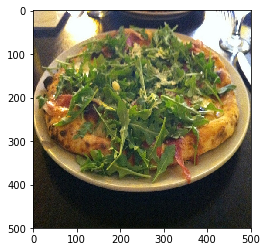

In [49]:
imgplot = imshow(image)